In [69]:
#Imports required
import pandas as pd
from sklearn import linear_model,metrics
from sklearn.model_selection import train_test_split
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

In [70]:

df = pd.read_csv("lab_sensor_log.csv")

In [71]:
df.head()

,id,Temperature,Humidity,AQI,Timestamp,Lab Id
0,1,28.0,56.0,462.0,13-03-2020 00:00,1001
1,2,28.0,56.0,462.0,13-03-2020 00:00,1001
2,3,25.0,64.0,111.0,13-03-2020 00:00,1001
3,4,25.0,55.0,105.0,16-03-2020 00:00,1001
4,5,26.0,77.0,250.0,16-03-2020 00:00,1001


In [72]:
df.shape

(571, 6)

In [73]:
df.head()

,id,Temperature,Humidity,AQI,Timestamp,Lab Id
0,1,28.0,56.0,462.0,13-03-2020 00:00,1001
1,2,28.0,56.0,462.0,13-03-2020 00:00,1001
2,3,25.0,64.0,111.0,13-03-2020 00:00,1001
3,4,25.0,55.0,105.0,16-03-2020 00:00,1001
4,5,26.0,77.0,250.0,16-03-2020 00:00,1001


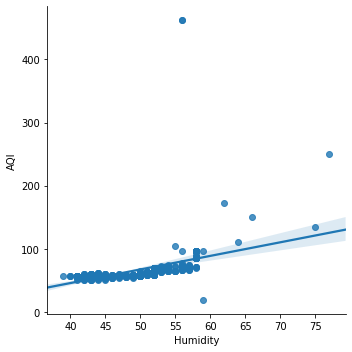

In [74]:
sns.lmplot(data = df,x = "Humidity",y="AQI")

In [86]:
from sklearn.preprocessing import MinMaxScaler
X = np.array(df["AQI"]).reshape(-1,1)
y = np.array(df["Temperature"]).reshape(-1,1)

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
y = scaler.transform(y)

X_train , X_test , y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [87]:

model = linear_model.LinearRegression()
model.fit(X_train , y_train)

print("Coefficients : {}".format(model.coef_))
print("Variance score : {}".format(model.score(X_test,y_test)))


Coefficients : [[-0.0244864]]
Variance score : 0.3167108595865773


Root Mean Squared Error: 0.0022663506471163946


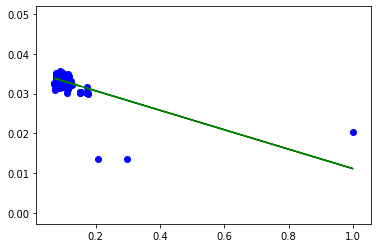

In [88]:
pred = model.predict(X_test)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
plt.scatter(X_test,y_test,color = "b")
plt.plot(X_test,pred,color = "g")
plt.show()